<a href="https://colab.research.google.com/github/seap-udea/tspice/blob/main/examples/tidal_signal_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tidal Signal Test

This notebook demonstrates how to calculate the tidal potential generated by various celestial bodies at a specific location on Earth using `tSPICE`.

In [1]:
try:
    from google.colab import drive
    %pip install -Uq tspice
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/tspice.git

Not running in Colab, skipping installation


In [2]:
import tspice

Welcome to tSPICE v0.0.2


In [3]:
#Initialize the kernels --> The first time takes a bit longer to download the kernels
#tspice.initialize(level='planetary')
tspice.initialize(level='full')

Directory for Kernels already exists at: /Users/jzuluaga/dev/tspice/examples/tspice_data
All kernels for level 'full' appear to be present.
Meta kernel created/updated at /Users/jzuluaga/dev/tspice/examples/tspice_data/meta_kernel.
TSPICE initialized successfully. Kernels loaded from: /Users/jzuluaga/dev/tspice/examples/tspice_data/meta_kernel
Kernels loaded from: /Users/jzuluaga/dev/tspice/examples/tspice_data/meta_kernel


In [6]:
earth = tspice.Body('Earth')

I'm using as example, the signal around (14 days before and after) the seismic event in Paratebueno, Colombia ($M_{w}=6.3$):

In [7]:
#Coordinates of the station in radians
loc = dict(lat = 4.49,
           lon = -73.14,
           depth = 9)

#Magnitude
#Mw = 6.3

#Dictionary with the start, stop, and step data
date = dict(start = '2025-05-25 13:08:05',
            stop = '2025-06-22 13:08:05',
            step = '1h',
            time_frame = 'UTC')

In [10]:
#Get the tidal potential due just to the Moon
tgp_one, et_utc = earth.tgp_one_body('Moon', loc_sta=loc, dates=date, nmax=6, time_array=True)

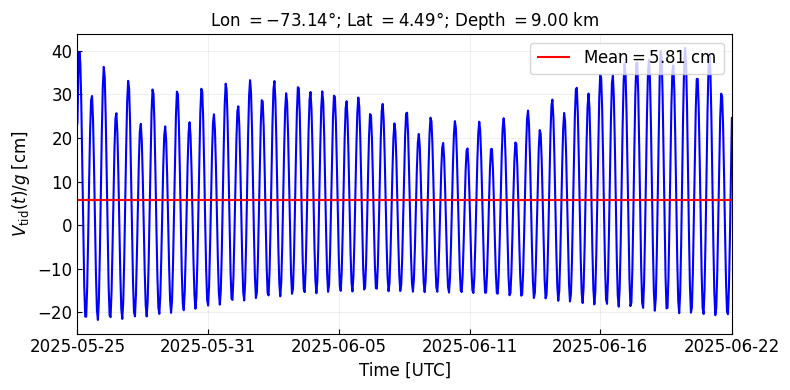

In [11]:
#Plotting the signal
earth.plot_one_signal(et_utc, tgp_one*100, loc=loc, colors=['blue','red'], mean_value=True)

In [12]:
from datetime import datetime
import spiceypy as spy

In [16]:
#List of bodies to consider for tidal calculations
bodylist = ['Moon', 'Sun', 'Mercury', 'Venus', 'Mars Barycenter', 'Jupiter Barycenter']

#To get the total tidal signal due to all the bodies in the list
tgp_many = earth.tgp_many_bodies(bodylist, loc_sta=loc, dates=date, nmax=6, body_signal=False, time_array=False)

Moon contribution calculated!
Sun contribution calculated!
Mercury contribution calculated!
Venus contribution calculated!
Mars Barycenter contribution calculated!
Jupiter Barycenter contribution calculated!


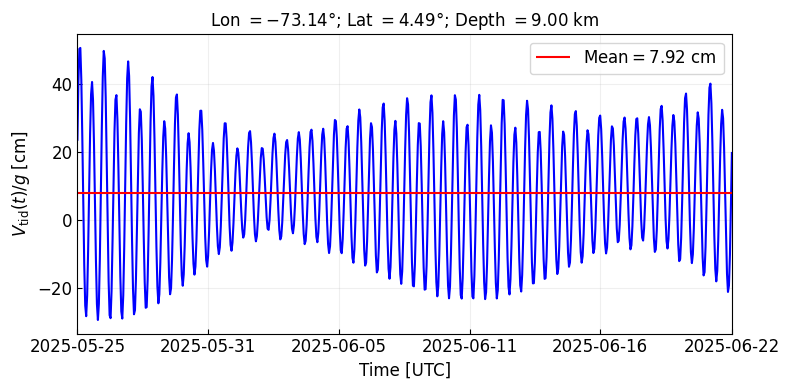

In [17]:
earth.plot_one_signal(et_utc, tgp_many*100, loc=loc, colors=['blue','red'], mean_value=True)

---
**Copyright**: 2026, Deivy Mercado, Jorge I. Zuluaga, Gloria Moncayo